In [1]:
from rnn_pytorch import *
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch import optim
import matplotlib.pyplot as plt
import numpy as np

/home/hujunshan/anaconda3/lib/python3.7/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([1, 50, 1])) that is different to the input size (torch.Size([50, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
EPOCH:20,Loss:0.415144
EPOCH:41,Loss:0.025356
EPOCH:62,Loss:0.021950
EPOCH:83,Loss:0.005217
EPOCH:104,Loss:0.001940
EPOCH:125,Loss:0.002648
EPOCH:146,Loss:0.001710
EPOCH:167,Loss:0.005192
EPOCH:188,Loss:0.025212
EPOCH:209,Loss:0.005799
EPOCH:230,Loss:0.001083
EPOCH:251,Loss:0.001110
EPOCH:272,Loss:0.000849
EPOCH:293,Loss:0.000567


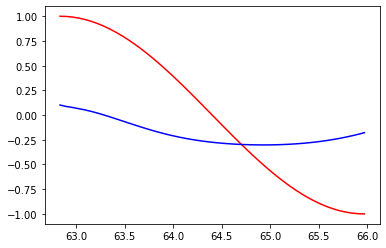

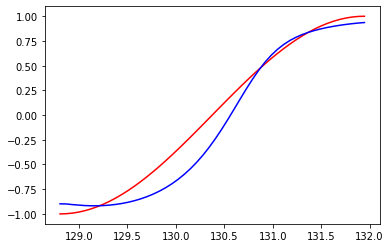

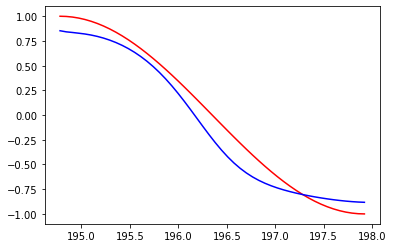

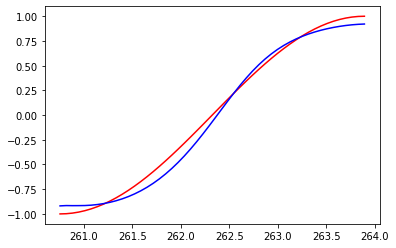

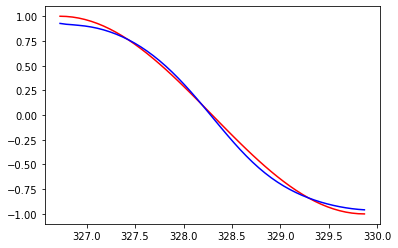

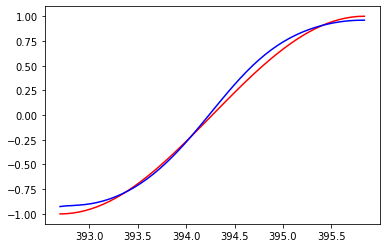

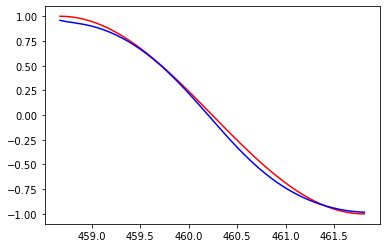

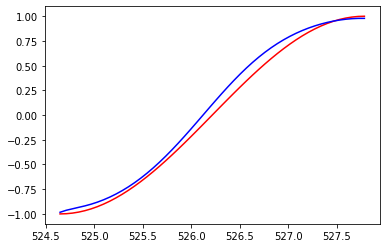

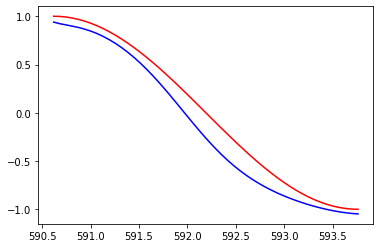

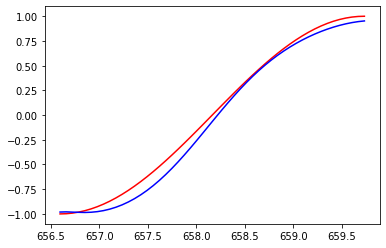

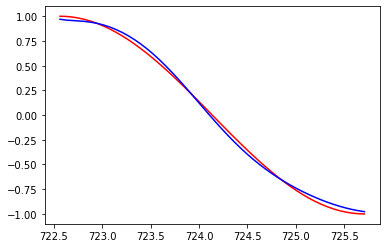

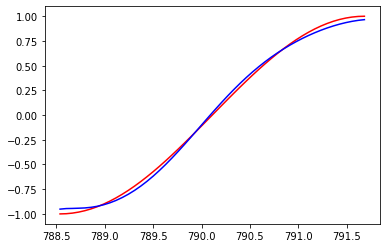

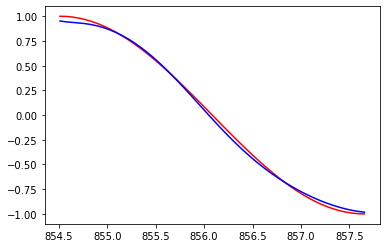

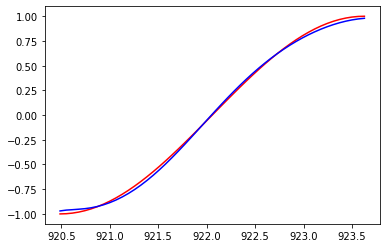

In [2]:
rnn.train()
plt.figure(2)
for step in range(EPOCHS):
    start, end =  step * np.pi, (step+1) * np.pi
    steps = np.linspace(start,end,TIME_STEP,dtype=np.float32)
    x_np = np.sin(steps)
    y_np = np.cos(steps)
    x = torch.from_numpy(x_np[np.newaxis,:,np.newaxis])
    y = torch.from_numpy(y_np[np.newaxis,:,np.newaxis])
    x = x.to(DEVICE)
    prediction,h_state = rnn(x,h_state)
    h_state = h_state.data
    loss = criterion(prediction.cpu(),y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (step+1)%21 == 0:
        print("EPOCH:{},Loss:{:4f}".format(step,loss))
        plt.plot(steps,y_np.flatten(),'r-')
        plt.plot(steps,prediction.cpu().data.numpy().flatten(),'b-')
        plt.draw()
        plt.pause(0.01)

Loss:0.9384


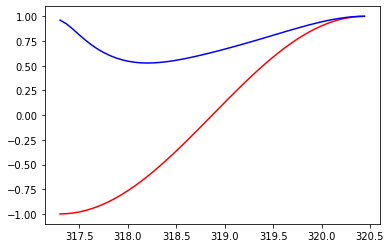

In [3]:
steps_test = np.linspace(101*np.pi,102*np.pi,TIME_STEP,dtype=np.float32)
x_test_np = np.sin(steps_test)
y_test_np = np.cos(steps_test)
x_test = torch.from_numpy(x_test_np[np.newaxis,:,np.newaxis])
y_test = torch.from_numpy(y_test_np[np.newaxis,:,np.newaxis])
x_test = x_test.to(DEVICE)
h_state = h_state.data
pre,h_state = rnn(x_test,h_state)
loss = criterion(pre.cpu(),y_test)
print("Loss:{:.4f}".format(loss))
plt.plot(steps_test,y_test_np,'r-')
plt.plot(steps_test,pre.cpu().data.numpy(),'b-')
plt.show()